# Tutorial 1: Basic data handeling with python

In [ ]:
'''
Content: 
    Getting started
        Importing the requiered libraries with a short reminder/explanation why we need them
    The data
        loading the data from the source and displaying it in a nice, clean way (pandas)
    Visualisation
        Basic visualisation of the data in order to get a better feeling for it
        Initial feature selection (eliminate redundancies)
    Feeding it into the algorithem
        Random forest classifier - What is it? 
    What do we see?
        What does the accuracy tell me? 
    Variable selection
    
        
'''    

#### Getting started

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
#import urllib.request
from sklearn import datasets

In [2]:
np.random.seed(2304)
%matplotlib inline


In [28]:
#url = 'https://assets.datacamp.com/production/course_1939/datasets/diabetes.csv'
#urllib.request.urlretrieve(url, 'diabetes.csv')
cancer = datasets.load_breast_cancer()
#print(cancer['DESCR'])
print(f"Features: {cancer['feature_names']}")



Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


5

In [4]:
#diabetes = pd.read_csv('diabetes.csv')
#diabetes.head()

In [5]:
print(f"Labels: {cancer['target_names']}")


Labels: ['malignant' 'benign']


In [6]:
cancer['data'].shape


(569, 30)

In [7]:
cancer_dataframe = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])
cancer_dataframe.head(5)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension           ...             worst radius  \
0                 0.07871           ...                    25.38   
1                 0.05667           ...                    24.99   
2                 0.05999           ...                    23.57   
3                 0.09744           ...                    14.91   
4                 0.05883           ...                    22.54   

   worst texture  worst perimeter  worst area  worst smoothness  \
0          17.33           184.60      2019.0            0.1622   
1          23.41           158.80      1956.0            0.1238   
2          25.53           152.50      1709.0            0.1444   
3          26.50            98.87       567.7            0.2098   
4          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758  
3                  0.17300  
4                  0.07678  

[5 rows x 30 columns]

#### What is this data? 

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

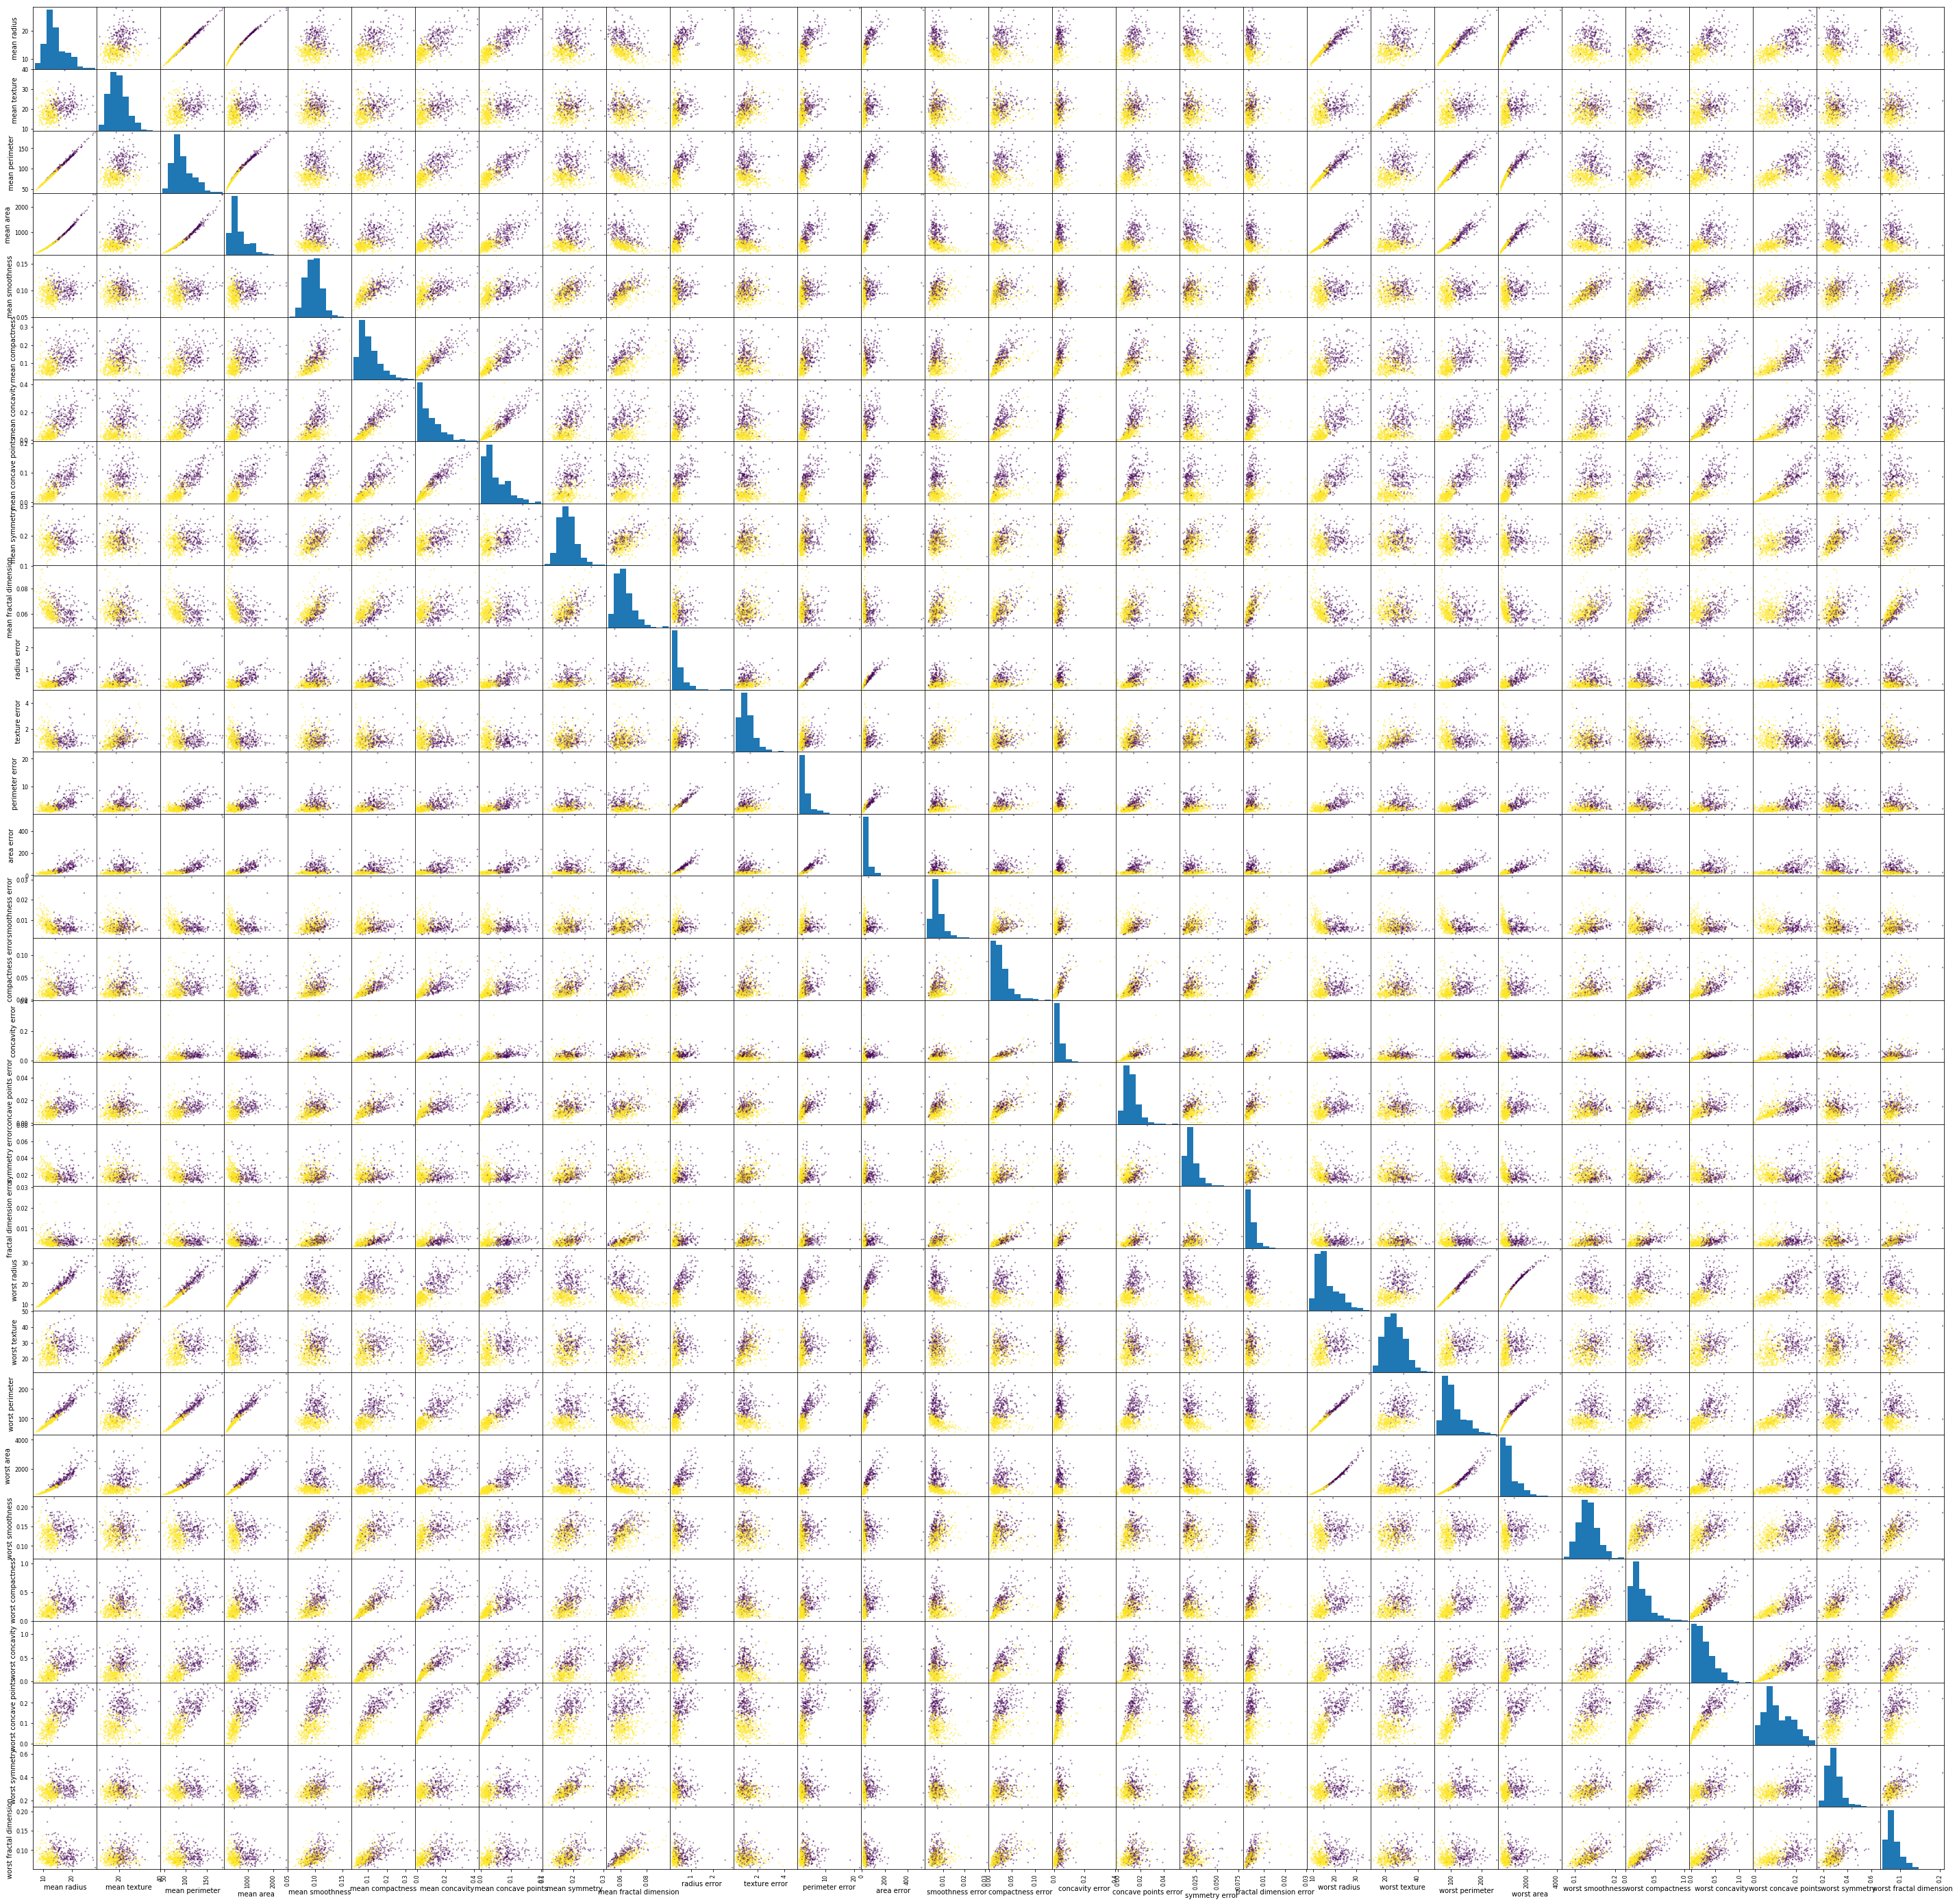

'Benign is yellow, Malignant is Violet'

In [8]:
pd.plotting.scatter_matrix(cancer_dataframe, c=cancer['target'], figsize=(50,50), marker='o', s=5)
plt.show()
'Benign is yellow, Malignant is Violet'
#pd.DataFrame.hist(cancer_dataframe, figsize=(20, 20))

'We can select the best features and feed them into mashine learning model'

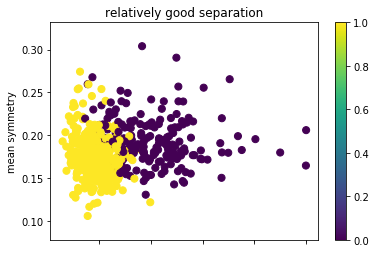

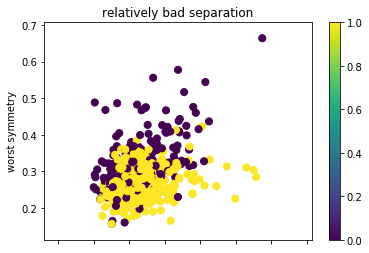

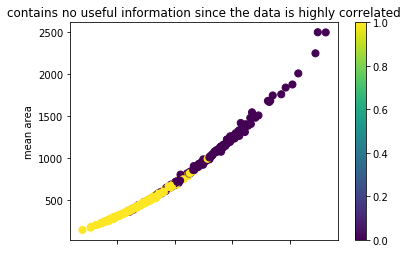

In [9]:
cancer_dataframe.plot.scatter(x='mean area', y='mean symmetry', c=cancer['target'], colormap='viridis', s=50, title='relatively good separation');
cancer_dataframe.plot.scatter(x='mean fractal dimension', y='worst symmetry', c=cancer['target'], colormap='viridis', s=50, title='relatively bad separation');
cancer_dataframe.plot.scatter(x='mean radius', y='mean area', c=cancer['target'], colormap='viridis', s=50, title='contains no useful information since the data is highly correlated');

'''some combinations of features are already well suited for the characterisation of cancer by themselfes. 
This is showcased by scatterplots with relatively clear separation between the two labels'''

'''We can select the best features and feed them into mashine learning model'''

###### We can see

In [59]:
X = cancer['data'][:]
y = cancer['target']

X.shape
#print(y[:300])





(569, 30)

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(f'Training data: {X_train.shape}\nTest data: {X_test.shape}')


Training data: (426, 30)
Test data: (143, 30)


In [62]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2304) # random_state for reproducibility
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.958041958041958

In [134]:
importances = rf.feature_importances_
importances

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)



array([[53,  1],
       [ 3, 86]], dtype=int64)

In [67]:
indices = np.argsort(importances)[::-1]
XX = cancer_dataframe[cancer_dataframe.columns[:]]

for f in range(XX.shape[1]): 
    print(f'{XX.columns[indices[f]]}: {np.round(importances[indices[f]],3)}')

'''!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!'''


worst concave points: 0.33
worst area: 0.084
mean radius: 0.082
worst perimeter: 0.073
mean concavity: 0.068
mean area: 0.066
worst concavity: 0.065
worst radius: 0.047
area error: 0.033
mean concave points: 0.026
mean texture: 0.025
worst texture: 0.018
symmetry error: 0.011
worst smoothness: 0.01
worst symmetry: 0.01
mean fractal dimension: 0.009
radius error: 0.005
perimeter error: 0.005
fractal dimension error: 0.005
concavity error: 0.005
texture error: 0.005
mean perimeter: 0.005
smoothness error: 0.004
mean symmetry: 0.003
compactness error: 0.002
worst fractal dimension: 0.002
mean smoothness: 0.001
worst compactness: 0.001
concave points error: 0.001
mean compactness: 0.001


'!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!'

In [135]:
'''we can see that many features are unimportant for the classification.
We can remove the unimportant features and repeat the classification'''

X2 = cancer['data'][:, [0, 1, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 25, 26, 27, 28, 29]]
#X2 = cancer['data'][:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29]]
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, random_state=42)
print(f'Training data: {X2_train.shape}\nTest data: {X2_test.shape}')

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=2304, class_weight='balanced') # random_state for reproducibility
rf.fit(X2_train, y2_train)
y2_pred = rf.predict(X2_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y2_test, y2_pred)


from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

#print(f"Features: {cancer['feature_names']}")

#importances = rf.feature_importances_
#importances

Training data: (426, 24)
Test data: (143, 24)


0.972027972027972